In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import math
import time
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
## Setting up the dataframe

df = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/datasets_14370_19291_pima-indians-diabetes.csv') # Reading csv file

df.columns = ['preg', 'glu', 'BP', 'skinTh', 'insulin', 'BMI', 'diaPedFun', 'age', 'class']   # Renaming the attribute names
originalDf = df.copy();
del df['class']  #Deleting the last column from dataframe

# build the scaler model
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(df)

#transform the test
X_scaled = scaler.transform(df)

df = pd.DataFrame(X_scaled)

df.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age']

df.head()

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [ ]:
originalDf[originalDf['class']==0]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
6,10,115,0,0,0,35.3,0.134,29,0
9,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,0.142,33,0
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0


In [ ]:
df2 = df.copy()   # Creating copy of the original dataset and storing it in df2
rows,columns = df2.shape;

df2.head()

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000


In [ ]:
## Function to calculate Eucledian Distance

def dist(plist1, plist2):
  return math.sqrt( (plist1[0] - plist2[0])**2 + (plist1[1] - plist2[1])**2 + (plist1[2] - plist2[2])**2 + (plist1[3] - plist2[3])**2 + (plist1[4] - plist2[4])**2 + (plist1[5] - plist2[5])**2 + (plist1[6] - plist2[6])**2 + (plist1[7] - plist2[7])**2) 

In [ ]:
# store starting time
begin = time.process_time()

In [ ]:
#K-Means Clustering Algorithm
 
#1 choose number of clustres
clusters = 2;
 
#2 randomly select centroids for each cluster
    #randomClusters = np.array(df2.loc[[5, 30]]) #Defining initial random clusters, 5th and 30th Tuple in this case
 
XminRow = df2.sample(n=1);
XmaxRow = df2.sample(n=1);
 
currentXminRow = XminRow
XminRow

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
248,0.058824,0.557789,0.704918,0.191919,0.0,0.448584,0.027754,0.033333


In [ ]:
currentXmaxRow = XmaxRow
XmaxRow

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
165,0.176471,0.743719,0.540984,0.252525,0.0,0.484352,0.076003,0.016667


In [ ]:
#3 calculate euclidean distance for each point from each centroid

#3.1 cluster1
df2['dFromXmin'] = 0
for i in range(rows):
  df2['dFromXmin'].iloc[i] = dist(currentXminRow.iloc[0], df2.iloc[i])

#3.2 cluster2
df2['dFromXmax'] = 0
for i in range(rows):
  df2['dFromXmax'].iloc[i] = dist(currentXmaxRow.iloc[0], df2.iloc[i])


df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.287287,0.384155
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.673496,0.509514
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.234902,0.347157
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.064146,0.969850
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.348173,0.369691
...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.931089,0.894198
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.227454,0.185341
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.330306,0.281457
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.505638,0.518380


In [ ]:
#4 assign the points to the clusters

df2['cluster'] = 0

for i in range (rows):
  if ( (df2.dFromXmin.iloc[i] < df2.dFromXmax.iloc[i]) ) :
    df2['cluster'].iloc[i] = 0
  else : 
    df2['cluster'].iloc[i] = 1

df2



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.287287,0.384155,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.673496,0.509514,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.234902,0.347157,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.064146,0.969850,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.348173,0.369691,0
...,...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.931089,0.894198,1
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.227454,0.185341,1
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.330306,0.281457,1
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.505638,0.518380,0


In [ ]:
#5 calculating new mean values and setting them as centroids

#save current centroids as previous centroids
previousXminRow = currentXminRow
previousXmaxRow = currentXmaxRow

#save current dataframe as previous dataframe
previousXminRowDataframe = df2[df2['cluster']==0];
previousXmaxRowDataframe = df2[df2['cluster']==1];

#calculate new centroids
currentXminRow = pd.DataFrame(df2[df2['cluster']==0].mean()).T;
currentXmaxRow = pd.DataFrame(df2[df2['cluster']==1].mean()).T;



In [ ]:
#3(1) calculate euclidean distance for each point from each centroid - second iteration

#3.1 cluster1
df2['dFromXmin'] = 0
for i in range (rows):
  df2['dFromXmin'].iloc[i] = dist(currentXminRow.iloc[0], df2.iloc[i])

#3.2 cluster2
df2['dFromXmax'] = 0
for i in range (rows):
  df2['dFromXmax'].iloc[i] = dist(currentXmaxRow.iloc[0], df2.iloc[i])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#4(1) assign the points to the clusters - second iteration

df2['cluster'] = 0

for i in range (rows):
  if ( (df2.dFromXmin.iloc[i] < df2.dFromXmax.iloc[i]) ) :
    df2['cluster'].iloc[i] = 0
  else : 
    df2['cluster'].iloc[i] = 1

df2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.186791,0.391289,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.597906,0.431132,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.232356,0.434457,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.934847,0.861251,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.282194,0.342728,0
...,...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.795768,0.663700,1
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.194545,0.280584,0
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.235219,0.197218,1
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.384917,0.411204,0


In [ ]:
#6 checking stopping criteria 

#save current dataframe 
currentXminRowDataframe = df2[df2['cluster']==0];
currentXmaxRowDataframe = df2[df2['cluster']==1];

flag1 = False;
flag2 = False;

while (True):

  #checking stopping criteria

  if ((previousXminRowDataframe.equals(currentXminRowDataframe))) :
    flag1 = True;
    break;
  if ((previousXminRow.equals(currentXminRow))) :
    flag2 = True;
    break;

  
  #3(n) calculate euclidean distance for each point from each centroid - nth iteration
  #3.1 cluster1
  df2['dFromXmin'] = 0
  for i in range (rows):
    df2['dFromXmin'].iloc[i] = dist(currentXminRow.iloc[0], df2.iloc[i])

  #3.2 cluster2
  df2['dFromXmax'] = 0
  for i in range (rows):
    df2['dFromXmax'].iloc[i] = dist(currentXmaxRow.iloc[0], df2.iloc[i])
  
  #4(n) assign the points to the clusters - nth iteration

  df2['cluster'] = 0

  for i in range (rows):
    if ( (df2.dFromXmin.iloc[i] < df2.dFromXmax.iloc[i]) ) :
     df2['cluster'].iloc[i] = 0
    else : 
     df2['cluster'].iloc[i] = 1


  #5(n) calculating new mean values and setting them as centroids - nth iteration

  #save previous centroids
  previousXminRow = currentXminRow
  previousXmaxRow = currentXmaxRow

  #calculate new centroids
  currentXminRow = pd.DataFrame(df2[df2['cluster']==0].mean()).T;
  currentXmaxRow = pd.DataFrame(df2[df2['cluster']==1].mean()).T;

  #save previous dataframe
  previousXminRowDataframe = currentXminRowDataframe;
  previousXmaxRowDataframe = currentXmaxRowDataframe;

  #save current dataframe 
  currentXminRowDataframe = df2[df2['cluster']==0];
  currentXmaxRowDataframe = df2[df2['cluster']==1];

  

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
end = time.process_time();

# total time taken
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 2.5277303200000016


In [ ]:
df2[df2['cluster'] == 0]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax,cluster
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.186791,0.391289,0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.232356,0.434457,0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.282194,0.342728,0
5,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,0.291765,0.397578,0
9,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.296926,0.402703,0
...,...,...,...,...,...,...,...,...,...,...,...
757,0.058824,0.532663,0.622951,0.000000,0.000000,0.558867,0.050811,0.083333,0.253908,0.439239,0
759,0.117647,0.442211,0.475410,0.262626,0.018913,0.423249,0.293766,0.016667,0.273446,0.403926,0
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.194545,0.280584,0
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,0.384917,0.411204,0


In [ ]:
df2[df2['cluster'] == 1]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax,cluster
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,0.597906,0.431132,1
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,0.934847,0.861251,1
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.795934,0.705293,1
7,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,0.903788,0.751383,1
8,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,0.751513,0.720145,1
...,...,...,...,...,...,...,...,...,...,...,...
758,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000,0.819598,0.686148,1
760,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667,0.622578,0.405090,1
761,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0.481888,0.480171,1
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.795768,0.663700,1


In [ ]:
originalDf['class'].iloc[1]

df2['cluster']

0      0
1      1
2      0
3      1
4      0
      ..
762    1
763    0
764    1
765    0
766    0
Name: cluster, Length: 767, dtype: int64

In [ ]:
# rows,columns = originalDf.shape;
df4 = df2.copy();

for i in range(rows):
  if (df2['cluster'].iloc[i] == originalDf['class'].iloc[i]):
    df4 = df4.drop(labels=i, axis=0)
    
df4


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax,cluster
5,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,0.291765,0.397578,0
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.795934,0.705293,1
11,0.588235,0.698492,0.655738,0.000000,0.000000,0.403875,0.581981,0.600000,0.826691,0.681847,1
15,0.000000,0.592965,0.688525,0.474747,0.271868,0.682563,0.201964,0.166667,0.474415,0.487299,0
16,0.411765,0.537688,0.606557,0.000000,0.000000,0.441133,0.075149,0.166667,0.342969,0.354675,0
...,...,...,...,...,...,...,...,...,...,...,...
756,0.000000,0.618090,0.590164,0.000000,0.000000,0.540984,0.076857,0.516667,0.455099,0.499179,0
761,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0.481888,0.480171,1
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.795768,0.663700,1
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.235219,0.197218,1


In [ ]:
inputs = df4.drop('cluster', axis=1)
target = df4['cluster']

In [ ]:
# Splitting test and train datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, shuffle=False)

# X_train  ---> Training data without class label
# y_train  ---> Training class labels of X_train

# X_test  ---> Testing data without class label
# y_test  ---> Testing class labels of X_test

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
model.score(X_test,y_test)

0.8428571428571429

In [ ]:
X_test[0:10]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromXmin,dFromXmax
518,0.352941,0.648241,0.737705,0.070707,0.385343,0.292101,0.215201,0.650000,0.697942,0.591651
521,0.352941,0.572864,0.000000,0.000000,0.000000,0.000000,0.047395,0.083333,0.822393,0.810671
532,0.352941,0.457286,0.000000,0.000000,0.000000,0.444113,0.180615,0.166667,0.674617,0.646068
546,0.235294,0.658291,0.557377,0.212121,0.196217,0.493294,0.035013,0.116667,0.269220,0.216949
547,0.058824,0.824121,0.672131,0.434343,0.079196,0.488823,0.112297,0.483333,0.537848,0.451767
548,0.235294,0.949749,0.901639,0.313131,0.000000,0.424739,0.257045,0.266667,0.590150,0.489839
551,0.352941,0.572864,0.721311,0.000000,0.000000,0.414307,0.072161,0.750000,0.678121,0.631788
554,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0.431535,0.292832
556,0.470588,0.552764,0.622951,0.000000,0.000000,0.414307,0.067891,0.616667,0.608258,0.537179
557,0.647059,0.517588,0.557377,0.404040,0.000000,0.688525,0.020495,0.350000,0.652359,0.532049


In [ ]:
y_test[0:10]

518    1
521    1
532    1
546    1
547    1
548    1
551    1
554    1
556    1
557    1
Name: cluster, dtype: int64

In [ ]:
model.predict(X_test[0:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.predict_proba(X_test[:10])

array([[1.86421098e-07, 9.99999814e-01],
       [8.14637034e-04, 9.99185363e-01],
       [2.43652838e-02, 9.75634716e-01],
       [4.74803313e-01, 5.25196687e-01],
       [1.64998820e-01, 8.35001180e-01],
       [9.38404088e-02, 9.06159591e-01],
       [3.82088233e-05, 9.99961791e-01],
       [5.60698482e-03, 9.94393015e-01],
       [1.74661757e-04, 9.99825338e-01],
       [9.72932633e-05, 9.99902707e-01]])

In [ ]:
truth = y_test
prediction =  model.predict(X_test)

print(classification_report(truth, prediction))

              precision    recall  f1-score   support

           0       0.56      0.77      0.65        13
           1       0.94      0.86      0.90        57

    accuracy                           0.84        70
   macro avg       0.75      0.81      0.77        70
weighted avg       0.87      0.84      0.85        70



In [ ]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

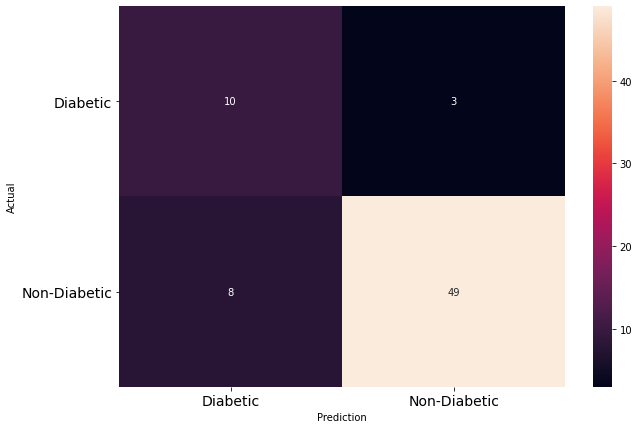

In [ ]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Diabetic","Non-Diabetic"])